In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from matplotlib import colormaps as cm

plt.style.use('default')

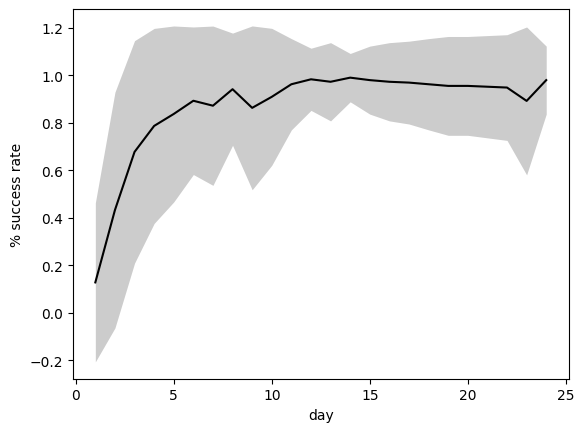

In [10]:
days = np.arange(1, 24 + 1, 1)
sn = 101
experiment = 'efc4'

dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.lineplot(x='day', y='trialPoint', data=dat, errorbar='sd', err_kws={'linewidth': 0}, color='k')

plt.ylabel('% success rate')
plt.show()

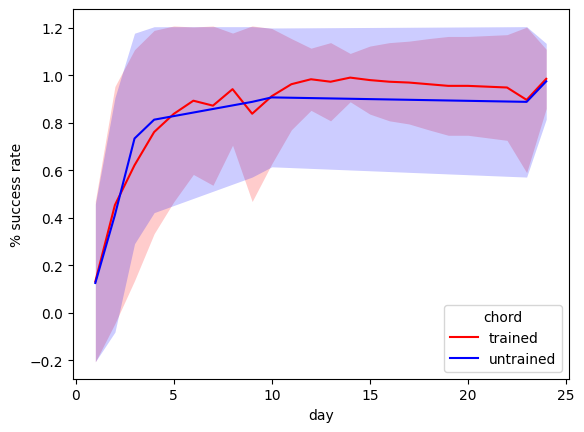

In [11]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

dat['chordID'] = dat['chordID'].astype(str)
sns.lineplot(x='day', y='trialPoint', hue='chord', data=dat, errorbar='sd', err_kws={'linewidth': 0}, palette=['red', 'blue'])

plt.ylabel('% success rate')
plt.show()

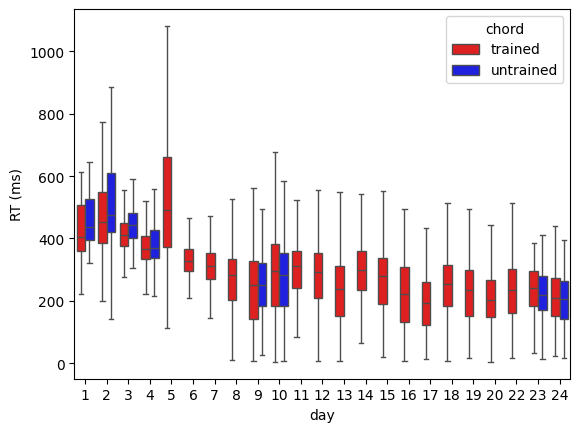

In [12]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.boxplot(x='day', y='RT', data=dat[dat['trialPoint']==1], hue='chord', showfliers=False, palette=['red', 'blue'])

plt.ylabel('RT (ms)')
plt.show()

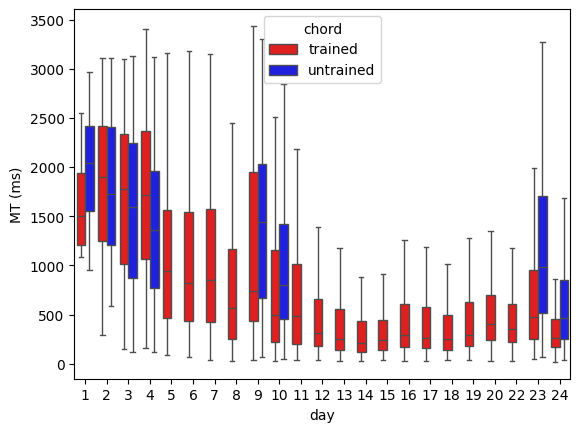

In [13]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.boxplot(x='day', y='ET', data=dat[dat['trialPoint']==1], hue='chord', palette=['red', 'blue'],showfliers=False)

plt.ylabel('MT (ms)')
plt.show()

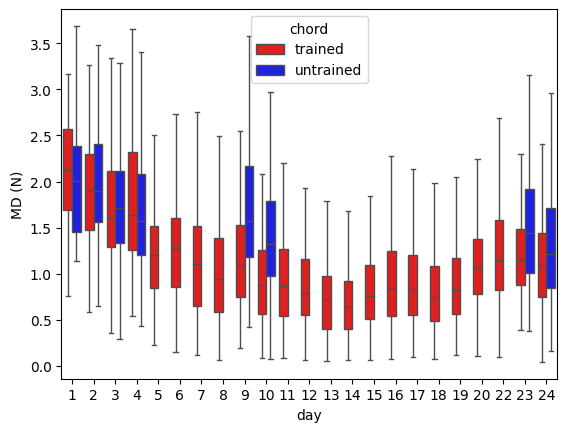

In [14]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.boxplot(x='day', y='MD', data=dat[dat['trialPoint']==1], hue='chord',showfliers=False, palette=['red', 'blue'])

plt.ylabel('MD (N)')
plt.show()

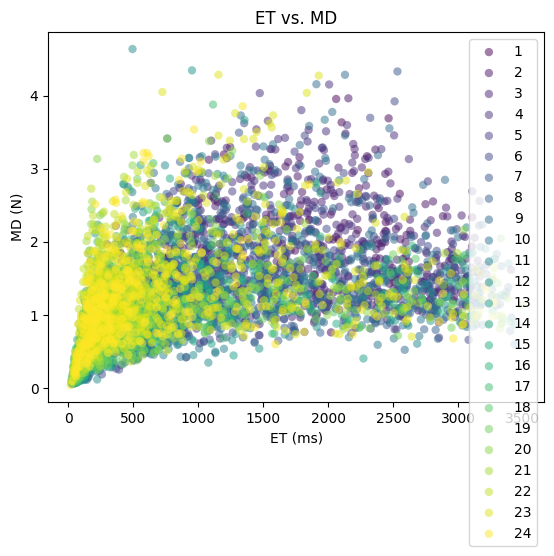

In [15]:
cmap=cm['viridis']
cindx = np.linspace(0, cmap.N - 1, len(days), dtype=int)
for day in days:
    path = os.path.join(gl.baseDir, 'efc4', 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat = pd.read_csv(path, sep='\t')
    dat = dat[dat['trialPoint']==1]

    plt.scatter(dat['ET'], dat['MD'], alpha=.5, edgecolors='none', color=cmap.colors[cindx[day - 1]], label=day)

plt.xlabel('ET (ms)')
plt.ylabel('MD (N)')
plt.title('ET vs. MD')
plt.legend()

plt.show()


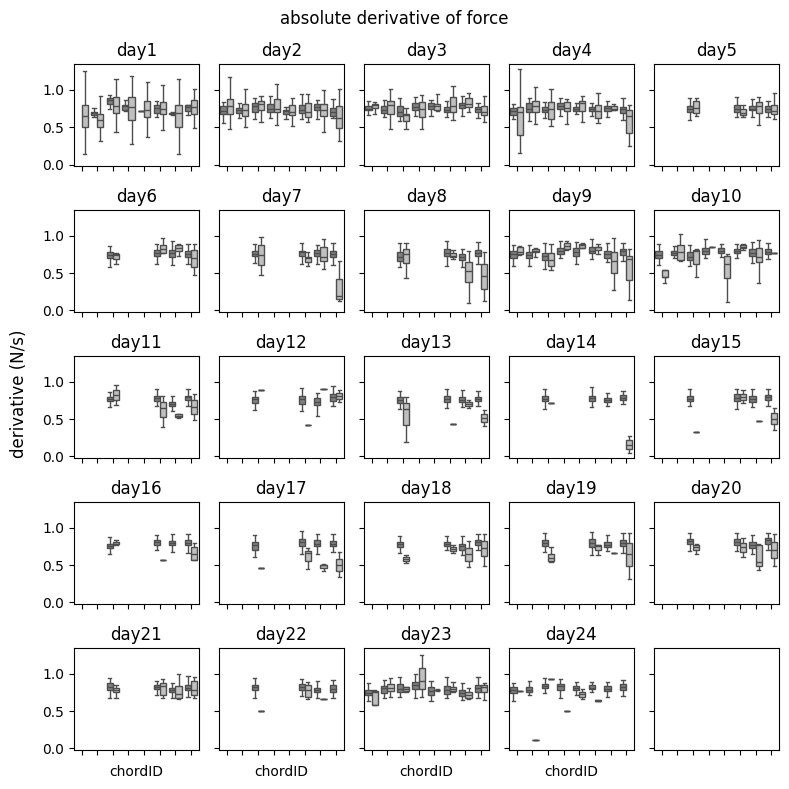

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8, 8))

for d, day in enumerate(days):
    row = d // 5
    col = d % 5

    data = pd.read_csv(os.path.join(gl.baseDir, experiment, 'behavioural', f'day{day}', f'{experiment}_{sn}_single_trial.tsv'), sep='\t')

    data['trialPoint'] = data['trialPoint'].map(gl.trialPoint_mapping)
    data['chordID'] = data['chordID'].astype(int)

    data_melt = data.melt(id_vars=['chordID', 'trialPoint', 'TN', 'BN'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', value_name='force_der')

    data_melt = data_melt.groupby(['chordID', 'trialPoint', 'TN', 'BN']).mean(numeric_only=True).reset_index()

    if d==1:
        sns.boxplot(data=data_melt, ax=axs[row, col], x='chordID', y='force_der', hue='trialPoint', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'], legend=False)
    else:
        sns.boxplot(data=data_melt, ax=axs[row, col], x='chordID', y='force_der', hue='trialPoint', showfliers=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'], legend=False)

    axs[row, col].set_xticks(axs[row, col].get_xticks())
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45, ha='right')
    axs[row, col].set_ylabel('')

    axs[row, col].set_title(f'day{day}')

fig.suptitle(f'absolute derivative of force')
fig.supylabel('derivative (N/s)')
fig.tight_layout()

plt.show()